# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipinfo
import json


ipinfo_handler = ipinfo.getHandler("de30fe3213f197")

seed = 42
dataset_folder = "dataset/" 

pd.options.mode.chained_assignment = None  # default='warn'
np.random.seed(seed)
plt.rcParams['figure.figsize'] = (18,6)
plt.rcParams.update({'font.size': 15})

# Processamento do dataset

In [2]:
data = pd.read_csv(dataset_folder + "Darknet.CSV", low_memory=False)

In [4]:
samples = data.copy()

traffic_labels = samples["Label"].unique()
print(traffic_labels)
traffic_type_labels = samples["Label.1"].unique()
print(traffic_type_labels)

['Non-Tor' 'NonVPN' 'Tor' 'VPN']
['AUDIO-STREAMING' 'Browsing' 'Chat' 'Email' 'File-Transfer'
 'File-transfer' 'P2P' 'Video-Streaming' 'Audio-Streaming'
 'Video-streaming' 'VOIP']


In [26]:
samples.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [5]:
samples['Label.1'].loc[samples['Label.1'] == 'AUDIO-STREAMING'] = 'Audio-Streaming'
samples['Label.1'].loc[samples['Label.1'] == 'File-transfer'] = 'File-Transfer'
samples['Label.1'].loc[samples['Label.1'] == 'Video-streaming'] = 'Video-Streaming'

traffic_type_labels = samples["Label.1"].unique()
print(traffic_type_labels)

['Audio-Streaming' 'Browsing' 'Chat' 'Email' 'File-Transfer' 'P2P'
 'Video-Streaming' 'VOIP']


In [6]:
samples['Label'].loc[(samples['Label'] == 'Non-Tor') | (samples['Label'] == 'NonVPN')] = 'Benign'
samples['Label'].loc[(samples['Label'] == 'Tor') | (samples['Label'] == 'VPN')] = 'Darknet'

traffic_labels = samples["Label"].unique()
print(traffic_labels)

['Benign' 'Darknet']


In [14]:
def create_grams(ip):
    parts = ip.split('.')
    one_gram = parts[0]
    two_gram = parts[0] + " " + parts[1]
    three_gram = parts[0] + " " + parts[1] + " " + parts[2]
    return one_gram, two_gram, three_gram

In [37]:
src_one_gram = []
src_two_gram = []
src_three_gram = []
dst_one_gram = []
dst_two_gram = []
dst_three_gram = []

for src_ip, dst_ip in zip(samples["Src IP"], samples["Dst IP"]): 
    src_one, src_two, src_three = create_grams(src_ip)
    src_one_gram.append(src_one)
    src_two_gram.append(src_two)
    src_three_gram.append(src_three)
    dst_one, dst_two, dst_three = create_grams(dst_ip)
    dst_one_gram.append(dst_one)
    dst_two_gram.append(dst_two)
    dst_three_gram.append(dst_three)

samples["src_ip_1gram"] = src_one_gram
samples["src_ip_2gram"] = src_two_gram
samples["src_ip_3gram"] = src_three_gram

samples["dst_ip_1gram"] = dst_one_gram
samples["dst_ip_2gram"] = dst_two_gram
samples["dst_ip_3gram"] = dst_three_gram

In [38]:
print(samples[["Src IP","src_ip_1gram","src_ip_2gram","src_ip_3gram"]][200:205])

            Src IP src_ip_1gram src_ip_2gram src_ip_3gram
200  10.152.152.11           10       10 152   10 152 152
201  74.125.28.189           74       74 125    74 125 28
202  74.125.28.189           74       74 125    74 125 28
203  10.152.152.11           10       10 152   10 152 152
204  10.152.152.11           10       10 152   10 152 152


In [39]:
print(samples[["Dst IP","dst_ip_1gram","dst_ip_2gram","dst_ip_3gram"]][:5])

           Dst IP dst_ip_1gram dst_ip_2gram dst_ip_3gram
0   216.58.220.99          216       216 58   216 58 220
1   216.58.220.99          216       216 58   216 58 220
2   216.58.220.99          216       216 58   216 58 220
3  74.125.136.120           74       74 125   74 125 136
4  173.194.65.127          173      173 194   173 194 65


In [40]:
hours = []
for timestamp in samples['Timestamp']:
    hora = int(timestamp.split()[1].split(':')[0])
    hours.append(hora)
samples['hour'] = hours

In [41]:
print(samples[['Timestamp', 'hour']][:5])

                Timestamp  hour
0  24/07/2015 04:09:48 PM     4
1  24/07/2015 04:09:48 PM     4
2  24/07/2015 04:09:48 PM     4
3  24/07/2015 04:09:48 PM     4
4  24/07/2015 04:09:45 PM     4


In [42]:
del samples['Flow ID']
print(samples.columns[:5])

Index(['Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol'], dtype='object')


# Análise do dataset

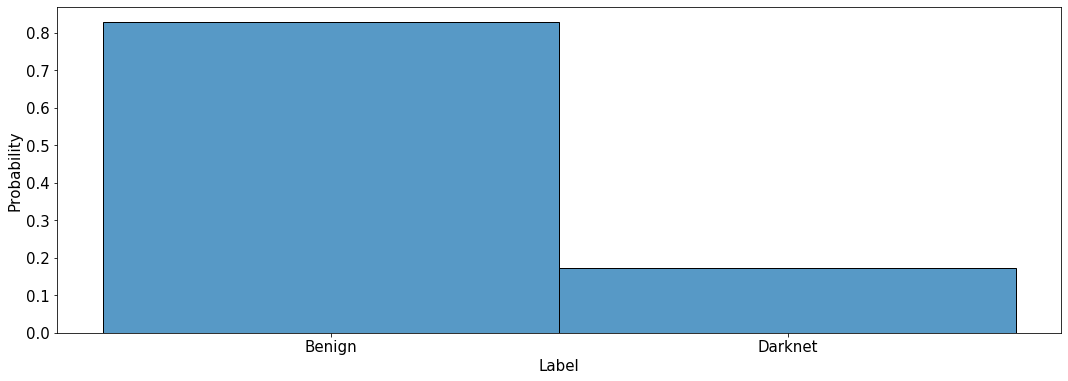

In [43]:
sns.histplot(data=samples, x="Label", stat="probability")
plt.show()

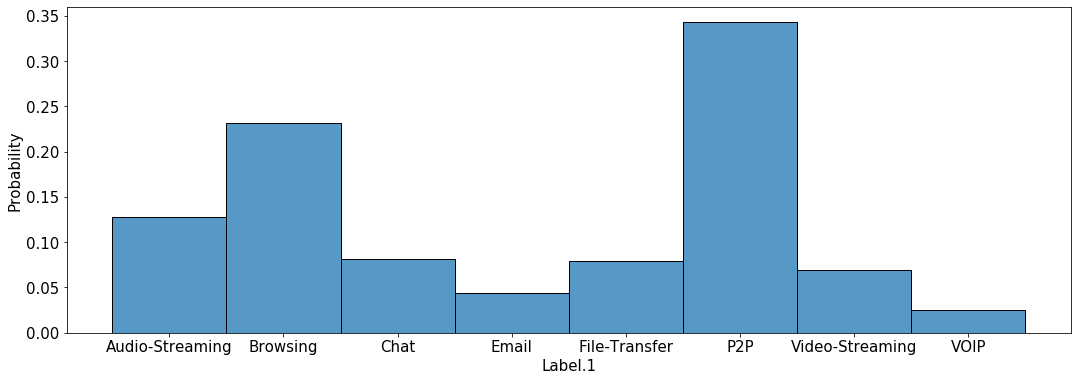

In [50]:
sns.histplot(data=samples, x="Label.1", stat="probability")
plt.show()

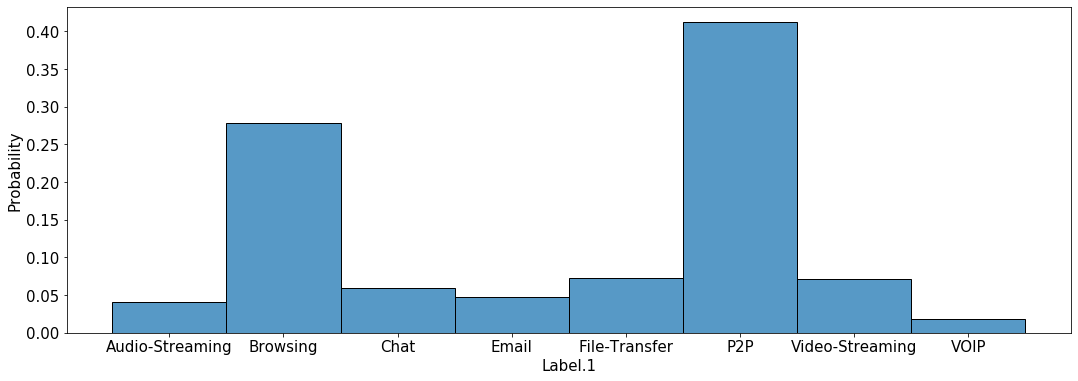

In [51]:
sns.histplot(data=samples[samples['Label'] == "Benign"], x="Label.1", stat="probability")
plt.show()

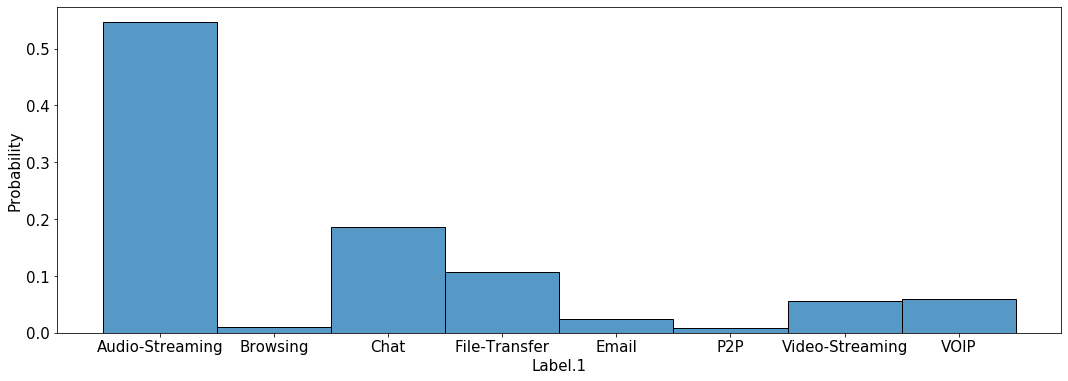

In [45]:
sns.histplot(data=samples[samples['Label'] == "Darknet"], x="Label.1", stat="probability")
plt.show()

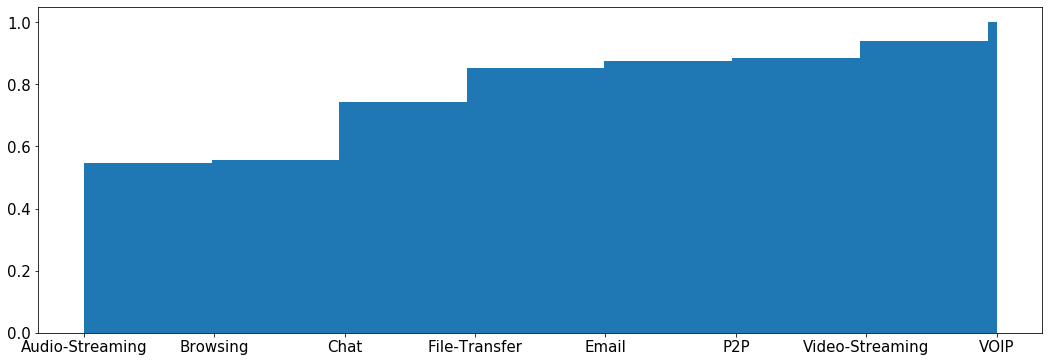

In [53]:
samples[samples['Label'] == "Darknet"]['Label.1'].hist(cumulative=True, density=1, bins=100, grid=False)
plt.show()

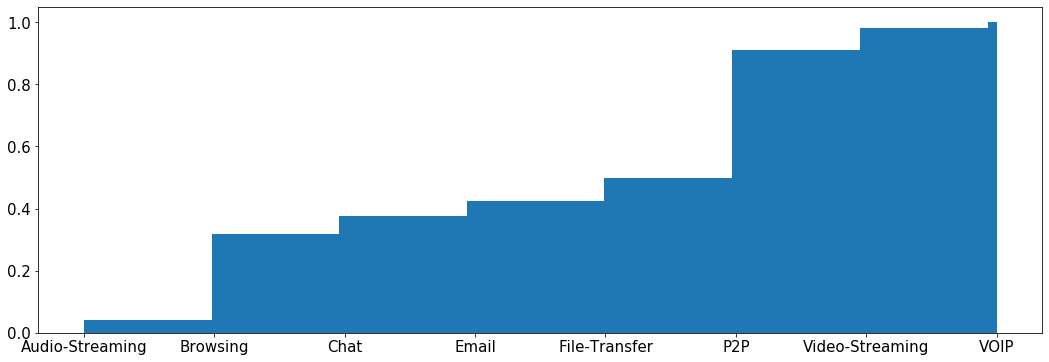

In [52]:
samples[samples['Label'] == "Benign"]['Label.1'].hist(cumulative=True, density=1, bins=100, grid=False)
plt.show()